# Ritz Approximation

**Problem Statement:**
Given a matrix $A \in \mathbb{C}^{N\times N}$ we wish to approximate the eigen-pair of $A$:
$$A x = \lambda x$$
in a lower dimension space where we have a matrix $V \in \mathbb{C}^{N \times m}$ where $(m < N)$, such that $V$ has orthogonal columns i.e $V V^{*} = I_N$, $V^{*} V = I_m$


## The Algorithm
Input: $A,V$
1. Compute $\bar{A} = V^{*}A V$
2. Solve $\bar{A}y = \mu y$
3. Compute the approximations:
$$\bar{x} = V y \qquad \bar{\lambda} = \mu$$
4. Calculate the error with $$\|A \bar{x} - \bar{\lambda} \bar{x}\|$$

## The Example
1. We'll generate a random square matrix that is a high dimension e.g $N = 100$, this is $A$
2. Then we're generate another random matrix this time of dimension $N \times m$ with $m < N$
3. To ensure that this matrix is orthogonal we'll take the QR decompostion of it i.e $V = QR$, where $Q^T Q = I_m$
4. Implement the Algorithm using SVD in numpy
5. Visualize the matrix with the ritz pairs by setting $m = 2$
5. Calculate the Error

[ 0.8755301  -0.40362925]
[-0.48316359  0.91492263]


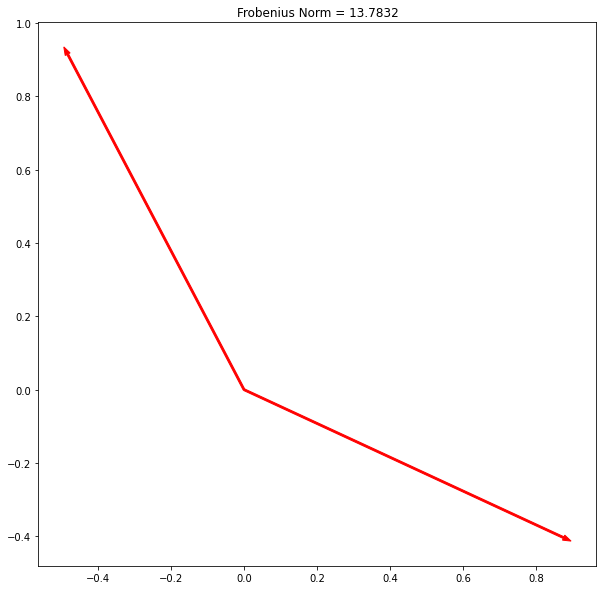

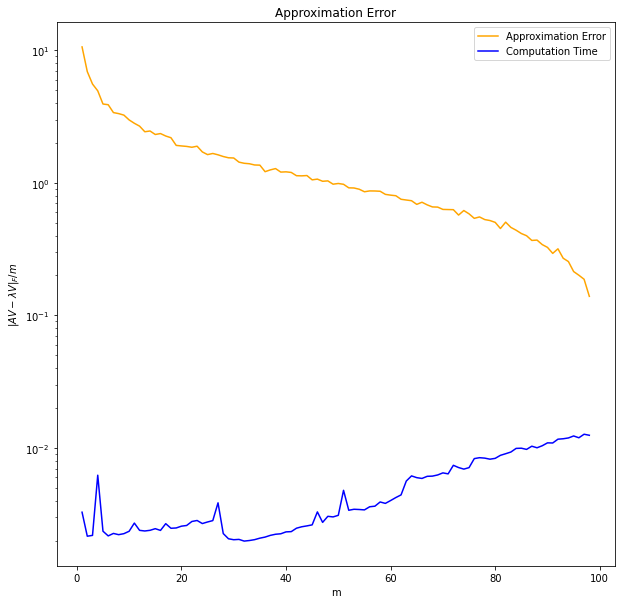

In [1]:
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt
import time
def ritz_example(N,m, dont_plot = False):
    st = time.time()
    np.random.seed(1921)
#     N = 100 
    ## Step 1
    A = np.random.multivariate_normal(mean = np.zeros(N), cov = np.diag(np.ones(N)), size = N)
    ## Step 2
    V = np.random.random(size = (N,m))
    ## Step 3
    V,_ = np.linalg.qr(V)
    ## Step 4
    A_bar = np.matmul(V.T, np.matmul(A,V))
    val, vecs = np.linalg.eig(A_bar)
    ## Step 5
    if m == 2 and (not dont_plot):
        fig, ax = plt.subplots(figsize = (10,10))
        for i in vecs:
            print(i)
            ax.arrow(0,0,i[0],i[1], color = "r", width = 0.005)
        ## Step 6
        x_bar = np.matmul(V, vecs)
        scaled_x_bar = val * x_bar
        R = np.matmul(A, x_bar) - scaled_x_bar
        error = np.linalg.norm(R)
        ax.set_title("Frobenius Norm = {:.4f}".format(error))
        plt.show()
    else:
        ## Step 6
        x_bar = np.matmul(V, vecs)
        scaled_x_bar = val * x_bar
        R = np.matmul(A, x_bar) - scaled_x_bar
        error = np.linalg.norm(R)
        et = time.time()
        elapsed_time = et - st
        return error / m, elapsed_time
N = 100
## Call the function to plot for m = 2
ritz_example(N,2,)
## Get results for different values of m to see if the error converges to 0
results = np.array([ritz_example(N,n, dont_plot = True) for n in np.arange(1,N-1)])
# print(np.array(results))
results, time = results[:,0], results[:,1]
## Plot the results
fig, ax = plt.subplots(figsize = (10,10))
x = np.arange(1,N-1)

ax.plot(x, results, label = "Approximation Error", color = "orange")
ax.plot(x, time, label = "Computation Time", color = "blue")
# time_fit = np.polyfit(x, np.log(time), deg = 1)
# ax.plot(x,time_fit[1] + time_fit[0]*x, label = "linear fit", color = "black")
ax.legend()
ax.set_title("Approximation Error")
ax.set_xlabel("m")
ax.set_ylabel("$\|AV - \lambda V\|_F / m$")
ax.set_yscale("log")
plt.show()

## Concluding
1. The Ritz approximation is a simple and consistent approximation algorithm for the eigenvalues and eigenvectors of a large matrix.
2. We don't need a specific space to project these into, we can use QR decomposition on a random matrix to obtain fast and easy results!